In [2]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt

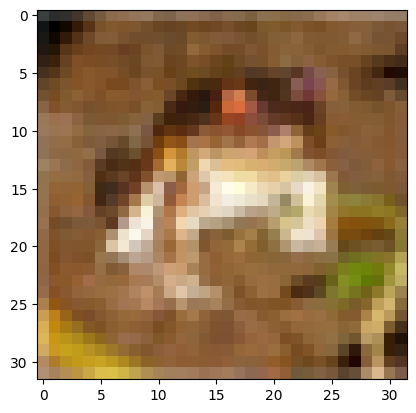

In [7]:
# FROG
plt.imshow(x_train[0])

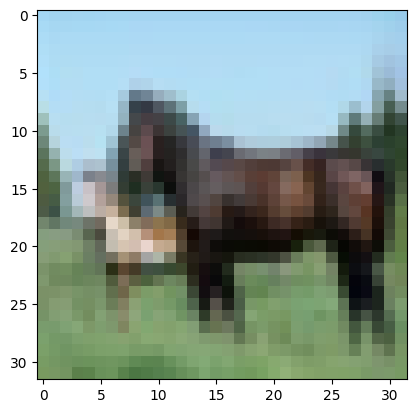

In [8]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
x_train[0].shape

(32, 32, 3)

In [11]:
x_train.max()

255

In [12]:
x_train = x_train/225

In [13]:
x_test = x_test/255

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train[0]

array([6], dtype=uint8)

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
y_cat_train.shape

(50000, 10)

In [21]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [22]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [28]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3661 - loss: 1.7490 - val_accuracy: 0.5744 - val_loss: 1.2309
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5790 - loss: 1.1928 - val_accuracy: 0.5817 - val_loss: 1.2025
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6478 - loss: 1.0162 - val_accuracy: 0.6600 - val_loss: 0.9854
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6947 - loss: 0.8876 - val_accuracy: 0.6606 - val_loss: 0.9903
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7269 - loss: 0.7990 - val_accuracy: 0.6788 - val_loss: 0.9415
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7539 - loss: 0.7083 - val_accuracy: 0.6824 - val_loss: 0.9519
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7779 - loss: 0.6446 - val_accuracy: 0.6763 - val_loss: 0.9667
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7987 - loss: 0

In [29]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.45798,1.517283,0.5744,1.230876
1,0.59436,1.154033,0.5817,1.202488
2,0.65476,0.998500,0.6600,0.985448
3,0.69536,0.889237,0.6606,0.990337
4,0.72608,0.799215,0.6788,0.941535


<Axes: >

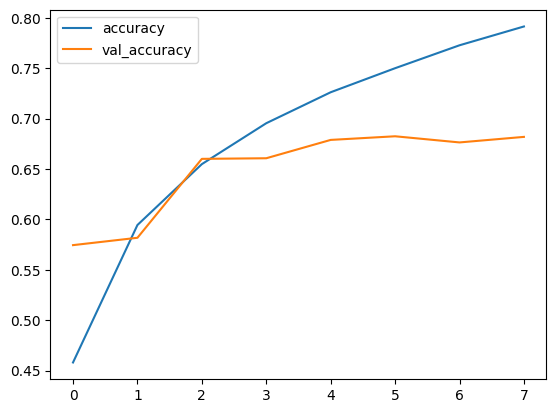

In [32]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

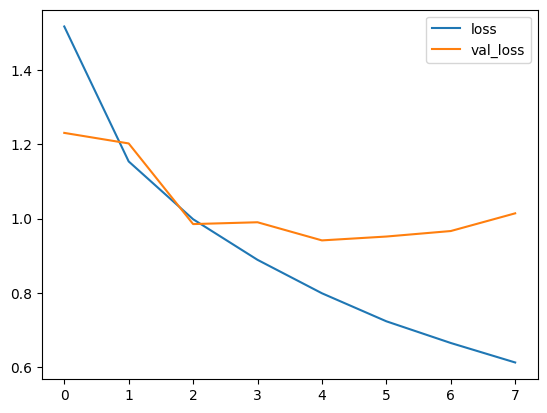

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'compile_metrics']

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.0143718719482422, 0.6818000078201294]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1000
           1       0.81      0.77      0.79      1000
           2       0.48      0.61      0.54      1000
           3       0.54      0.39      0.46      1000
           4       0.70      0.55      0.61      1000
           5       0.55      0.61      0.58      1000
           6       0.74      0.76      0.75      1000
           7       0.88      0.55      0.68      1000
           8       0.58      0.92      0.71      1000
           9       0.77      0.71      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[665,  25,  50,   5,   8,   9,   9,   3, 206,  20],
       [ 22, 769,  13,   9,   1,   5,  10,   1, 105,  65],
       [ 83,   8, 613,  35,  45,  71,  60,   9,  59,  17],
       [ 34,  22, 138, 394,  48, 210,  62,  11,  58,  23],
       [ 41,   4, 145,  49, 550,  58,  67,  24,  54,   8],
       [ 20,   7,  99, 131,  37, 614,  39,  16,  25,  12],
       [ 15,  10,  74,  52,  30,  19, 757,   1,  30,  12],
       [ 32,   7, 104,  44,  69, 122,  12, 548,  23,  39],
       [ 27,  13,  14,   4,   3,   3,   1,   0, 924,  11],
       [ 39,  89,  17,   8,   0,   9,   3,   7, 118, 710]], dtype=int64)

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, fmt='d', cmap='YlGnBu')


NameError: name 'plt' is not defined

# Predicting a given image

In [ ]:
my_image = x_test[16]

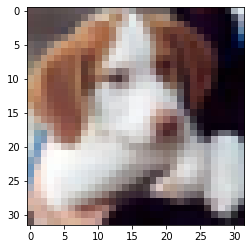

In [ ]:
plt.imshow(my_image)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html